## Ethan Sterbis

### Particle 1D Box Jupyter Notebook
### 9/30/2024

## Particle in 1D box
### Solutions to SE for a particle of mass $m$ in the box of length $L$:  
### $\Psi_n(x) = \sqrt{\frac{2}{L}} sin(\frac{n \pi x}{L})$
### with energies 
### $E_n = \frac{\hbar^2 \pi^2 n^2} {2 m L^2}$ 

### Let's plot wavefunctions and densities for a few lowest states

In [1]:
import numpy as np    # np is just a nickname 
%matplotlib inline
import matplotlib.pyplot as plt  # plt is just a nickname 

# constants
hbar=1
m=1  # mass of electron

L=5  # dimension of the box 
N=200 # grid: this defines how many points will be used to represent x coordinate in numerical integration

# numpy array of N equally spaced points between 0 and L
x_axis = np.linspace(0,L,N)

# Solutions to the 1D particle in a box problem for an arbitrary state n >=1 
# eigenstate 
def Psi1D(n):
    if n < 1:
        raise ValueError(f"n = {n}; however the quantum number n for 1D box should be larger than 0")
    else:
        return np.sqrt(2/L) * np.sin(n * np.pi * x_axis/L)

# eigenvalue
def Ene1D(n):
    if n < 1:
        raise ValueError(f"n = {n}; however the quantum number n for 1D box should be larger than 0")
    else:
        return (hbar**2 * (np.pi)**2 * n**2) / (2 * m * L**2)


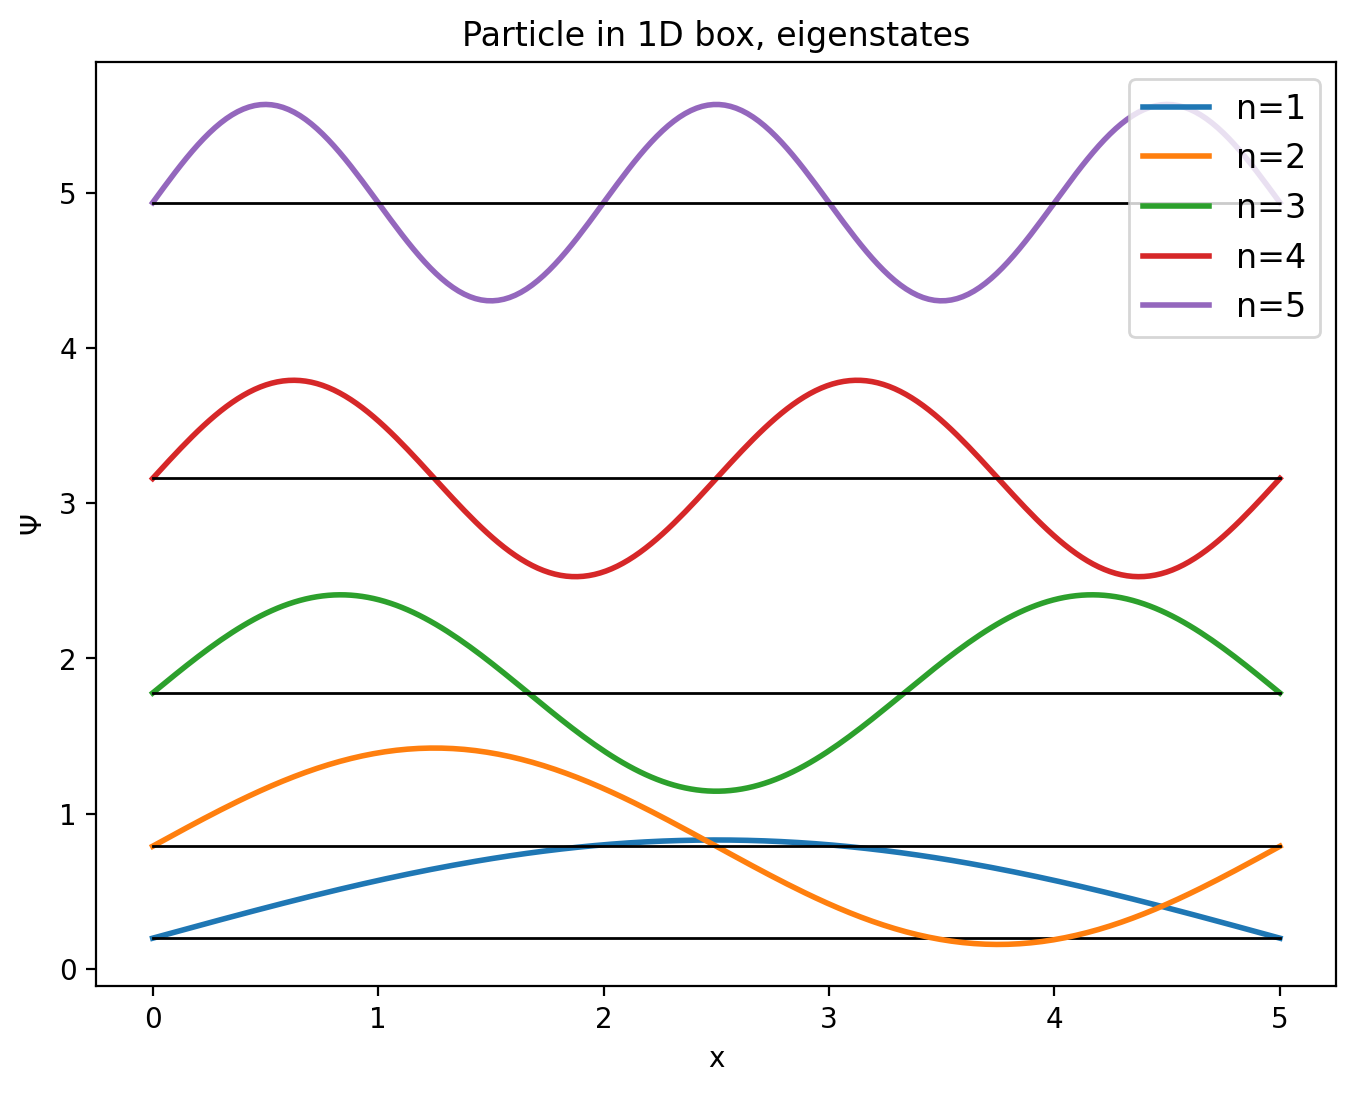

In [2]:
# plot eigenstates

y_zero = np.zeros(N)  # numpy array of N zeroes

# initialize plot 
fig = plt.figure(figsize=(8,6), dpi=200)

plt.title("Particle in 1D box, eigenstates")
plt.xlabel("x")
plt.ylabel("$\Psi$")  

for i in range(1,6):    # loop over i from 1 till 6
    plt.plot(x_axis, Psi1D(i) + Ene1D(i), '-', label=f"n={i}", lw=2)     # Ene1D(i) shifts wavefunction to higher energy - just to make plots beautiful
    plt.plot(x_axis, y_zero + Ene1D(i), '-', color="black", lw=1)

plt.legend(fontsize=12)
plt.show()


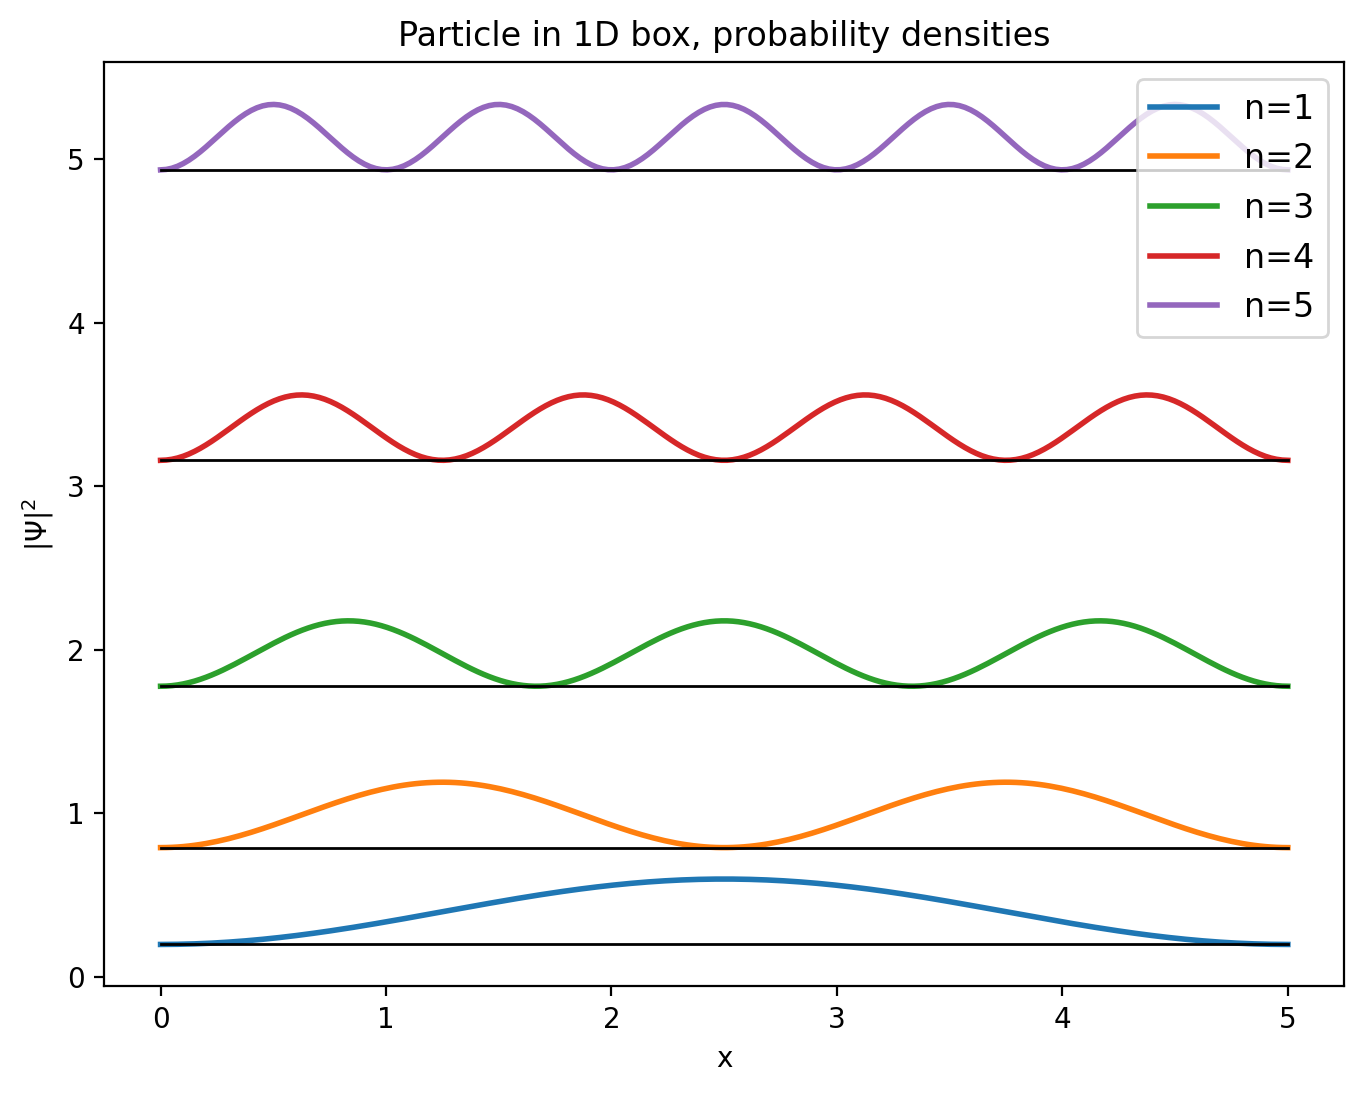

In [3]:
# plot probability densities |Psi|^2
# np.conjugate is handy for computing complex conjugate

fig = plt.figure(figsize=(8,6), dpi=200)

plt.title("Particle in 1D box, probability densities")
plt.xlabel("x")
plt.ylabel("$|\Psi|^2$")

for i in range(1,6):
    plt.plot(x_axis, np.conjugate(Psi1D(i)) * Psi1D(i) + Ene1D(i), '-',label=f"n={i}", lw=2)
    plt.plot(x_axis, y_zero + Ene1D(i), '-', color="black", lw=1)

plt.legend(fontsize=12)
plt.show()


## Now let's compute probability to find a particle somewhere in the box  
### By definition
### $ P_{ab} = \int_a^b \psi^*(x) \psi(x) dx $ 
### <span style ='color:Blue'> Q: Do we need to normalize $ \Psi(x) $ before computing probabilities? 


In [4]:
### Python can compute integrals in multiple ways. 
# We will use a simple integration of 1D linear spaces using python build-in sum() function:
# sum() takes an array as an argument and adds up all elements of this array; 
# to compute the integral we just need to multiply the result by dx 
# (the interval between points in the array), i.e.:
# Integral = sum(array)*dx
# Effectively, this is computing the integral using the Riemann sum

dx = x_axis[1]-x_axis[0]

# For example, let's check the norm of the wavefunction for state n=1:
norm = sum(np.conjugate(Psi1D(1))*Psi1D(1)) * dx

# note a formatting command for printing numerical values
print(f"Norm = {norm:6.4f}")

# In order to compute the integral between arbitraty limits a and b 
# (different from the first and last point of the array), we need to relate a point  
# on x axis (a) with an index of the aray representing x axis. 
# The following two functions will do it.

def x2index(a):
    if 0 <= a <= L:
        return int(a/L*N)
    else:
        raise ValueError(f"a={a} is out of bounds; exit")

def index2x(index):
    if 0 <= index <= N:
        return (index/N*L)
    else:
        raise ValueError(f"index={index} is out of bounds; exit")

# Example: compute a probability to find a particle within a left half of the box
a = 0
b = L/2

index_a = x2index(a)
index_b = x2index(b)

# note how a slice is used in defining initial and final elements for summation:
P_ab = sum(np.conjugate(Psi1D(1)[index_a : index_b]) * Psi1D(1)[index_a : index_b]) * dx

print(f"Probability to find a particle between {a} and {b} is {P_ab:6.4f}")   


Norm = 1.0000
Probability to find a particle between 0 and 2.5 is 0.5000


## Now we will examine the wavefunction from Lecture 10:

### $ \Psi(x,0) = A * x * (L-x) $


Psi_0 norm = 1.0000


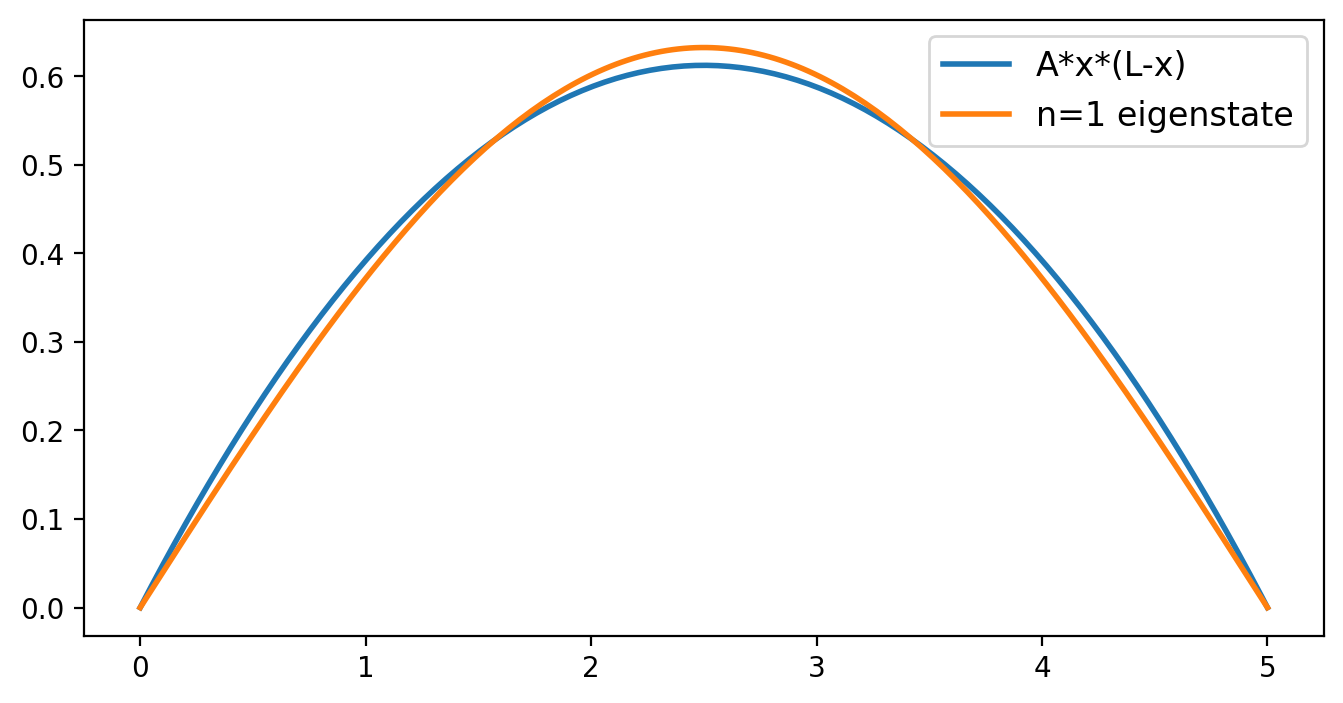

In [5]:
# First, we define this function using linear space 

Psi_0 = x_axis*(L-x_axis)

# and normalize it 
norm = sum(np.conjugate(Psi_0)*Psi_0)*dx
Psi_0 = Psi_0/np.sqrt(norm)

# check that the function is properly normalized
norm = sum(np.conjugate(Psi_0)*Psi_0)*dx
print(f"Psi_0 norm = {norm:6.4f}")

# Let's plot and compare this function with the n=1 eigenstate:
fig = plt.figure(figsize=(8,4), dpi=200)
plt.plot(x_axis, Psi_0, '-',label=f"A*x*(L-x)", lw=2)
plt.plot(x_axis, Psi1D(1), '-',label=f"n=1 eigenstate", lw=2)
plt.legend(fontsize=12)
plt.show()


## Expectation values

### Let's compute the expectation value of the position first. This is very easy:
### $\langle x \rangle = \int_0^L \psi^*(x) x \psi(x) dx $


In [6]:
# position expectation value

# for the n=1 eigenstate (using an alternative way to use sum()):
x_ave_Psi1 = (np.conjugate(Psi1D(1)) * x_axis * Psi1D(1)).sum()*dx
print(f"1st eigenstate <x> = {x_ave_Psi1:6.4f}")

# for the in-class function:
x_ave_Psi_0 = (np.conjugate(Psi_0) * x_axis * Psi_0).sum()*dx
print(f"class function <x> = {x_ave_Psi_0:6.4f}")  


1st eigenstate <x> = 2.5000
class function <x> = 2.5000


### Momentum expectation value:
### $\langle \hat{p} \rangle = \frac{\hbar}{i}\int_0^L \psi^*(x) \frac{d}{dx} \psi(x) dx $

### Here we need to compute a derivative of the wavefunction. Use numerical differentiation:
### $\frac{df(x)}{dx} = \frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i} $


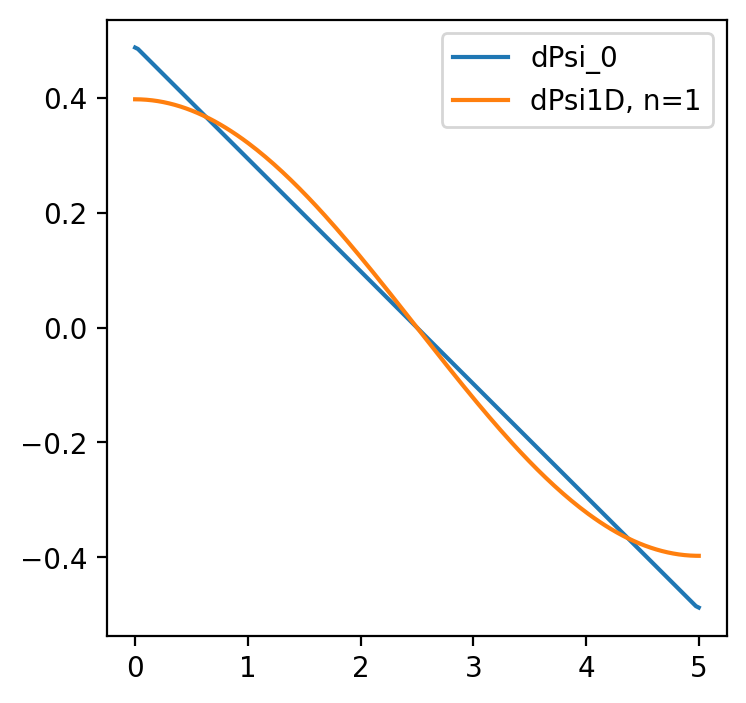

In [7]:
# Numpy gradient() can compute a derivative of an array:

dPsi_0 = np.gradient(Psi_0,dx)

# and similarly for a function defined on a linear space:
def dPsi1D(n):
    return np.gradient(Psi1D(n),dx)

# let's check that gradients are computed correctly
fig = plt.figure(figsize=(4,4), dpi=200)
plt.plot(x_axis, dPsi_0, label="dPsi_0")
plt.plot(x_axis, dPsi1D(1), label="dPsi1D, n=1")
plt.legend()

In [8]:
# and now momentum expectation values
# 1j is numpy "i"

# momentum expectation value for n=1 state
p_exp = (hbar/1j * np.conjugate(Psi1D(1)) * dPsi1D(1)).sum() * dx 
print(f"1st eigenstate <p> = {p_exp:6.4f}")

# momentum expectation value for in-class function
p_exp = (hbar/1j * np.conjugate(Psi_0) * dPsi_0).sum() * dx 
print(f"class function <p> = {p_exp:6.4f}")


1st eigenstate <p> = 0.0000+0.0000j
class function <p> = 0.0000+0.0000j


### Energy expectation value. For a particle inside the box, the total energy is equal to the kinetic energy:
### $\langle \hat{H} \rangle = \langle \hat{T} \rangle= -\frac{\hbar^2}{2m}\int_0^L \psi^*(x) \frac{d^2}{dx^2} \psi(x) dx $


In [9]:
# second derivative is computed as a derivative of the first derivative
# for our in-class function
ddPsi_0 = np.gradient(dPsi_0,dx)

# for eigenstates:
def ddPsi1D(n):
    return np.gradient(dPsi1D(n),dx)

# average energy of n=1 eigenstate
E_exp_Psi1D = -hbar**2/(2*m)*(np.conjugate(Psi1D(1)) *ddPsi1D(1)).sum()*dx
print(f"1st eigenstate <H> = {E_exp_Psi1D:6.4f}")

# average energy for the in-class function
E_exp_Psi_0 = -hbar**2/(2*m)*(np.conjugate(Psi_0)*ddPsi_0).sum() * dx
print(f"Class function <H> = {E_exp_Psi_0:6.4f}")

1st eigenstate <H> = 0.1974
Class function <H> = 0.2000


## Decomposition of the wavefunction into Hamiltonian eigenstates
### Let's decompose the $ \Psi(x,0) = A*x*(L-x)$ wavefunction into the eigenstates of the Hamiltonian.
### For that, we need to compute $c_n$ coefficients: 
### $ \Psi(x,0) = \Sigma_n c_n \psi_n$,   
### $c_n = \int_0^L \psi^*_n(x) \Psi(x,0)  dx $

In [10]:
# first compute c1:
c1 = (np.conjugate(Psi1D(1)) * Psi_0).sum() * dx
print(f"c1 = {c1:2.4e}")

# and now we can generalize it for any c_n:
print("\nFirst 10 cn coefficients")
for n in range(1,11):
    cn = (np.conjugate(Psi1D(n)) * Psi_0).sum() * dx
    print(f"c{n} = {cn:2.2e}")


c1 = 9.9928e-01

First 10 cn coefficients
c1 = 9.99e-01
c2 = 0.00e+00
c3 = 3.70e-02
c4 = 1.12e-16
c5 = 7.99e-03
c6 = -6.69e-17
c7 = 2.91e-03
c8 = 3.35e-17
c9 = 1.37e-03
c10 = -2.23e-17


### Knowing coefficients $c_n$, we can compute the expectation value of energy as 
### $<H> = \sum_n |c_n|^2 E_n$

In [11]:
# compute the expectation value of energy for the class function 
# and compare it with the previous result:

E_exp_cn = 0.0
for n in range(1,11):
    cn = (np.conjugate(Psi1D(n)) * Psi_0).sum() * dx
    E_exp_cn += Ene1D(n) * np.conjugate(cn) * cn
print(f"\n<H> = {E_exp_cn:4.4f}")

print(f"Error in energy calculations {(E_exp_Psi_0 - E_exp_cn):2.2e}")



<H> = 0.2000
Error in energy calculations 1.21e-05


## Knowledge of coefficients $c_n$ gives access to time evolution of the wavefunctions:
### $\Psi(x,t) = \Sigma_n c_n \psi_n \exp(-\frac{i E_n t}{\hbar})$   

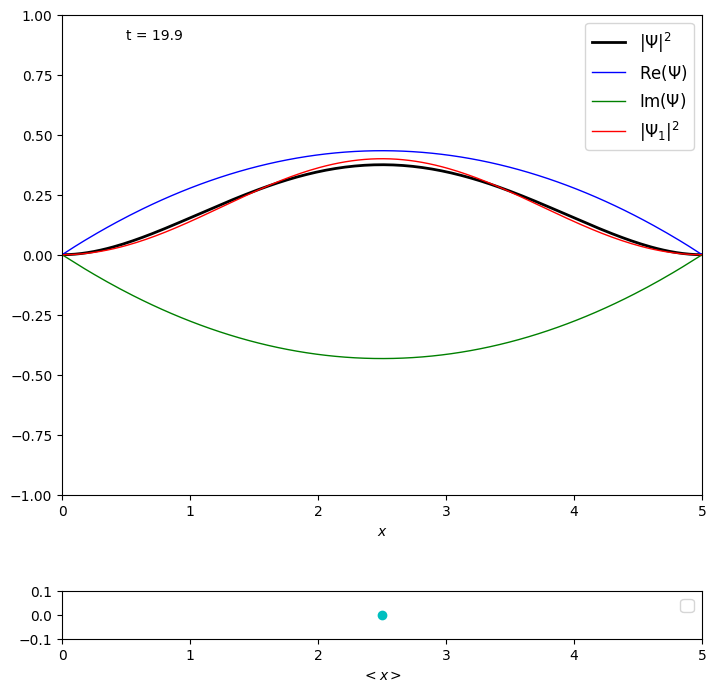

In [19]:
from IPython.display import *
import scipy


# func is an arbitrary function (array) defined on x_axis array
func = Psi_0
#func = 1/np.sqrt(2)*Psi1D(1) + 1/np.sqrt(2)*Psi1D(2)

# time-dependent wave function defined on x_axis array
def wf_td(t):
    wf = np.zeros(N)
    for n in range(1,100):
        cn = (np.conjugate(Psi1D(n))*func).sum() * dx
        wf = wf + cn * Psi1D(n) * np.exp(-1j * Ene1D(n) * t/hbar)
    return wf

# time-dependent expectation value of position
def x_exp_td(t):
    wf = np.zeros(N)
    x_exp = 0
    for n in range(1,100):
        cn = (np.conjugate(Psi1D(n)) * func).sum() * dx
        wf = wf + cn * Psi1D(n) * np.exp(-1j * Ene1D(n) * t/hbar)
    x_exp = (np.conjugate(wf) * x_axis * wf).sum() * dx
    return x_exp

# initialization
t = 0
t_max = 200   # maximum time - defines the length of this simulation

y = np.zeros(200)
x_ave_0 = x_exp_td(0)

fig = plt.figure()
ax1 = plt.axes([0.0,0.0,1,1])
graph_handle1, = plt.plot(x_axis, y, lw=2, color='black', label='$|\Psi|^2$')
graph_handle2, = plt.plot(x_axis, y, lw=1, color='blue', label='Re($\Psi$)')
graph_handle3, = plt.plot(x_axis, y, lw=1, color='green', label='Im($\Psi$)')
graph_handle4, = plt.plot(x_axis, y, lw=1, color='red', label='$|\Psi_1|^2$')
text_handle = plt.text(0.1*L,0.9,'t = '+'{:.1f}'.format(t))
plt.xlabel('$x$')
plt.xlim([0,L])
plt.ylim([-1,1])
plt.legend(fontsize=12, loc=1)

ax2 = plt.axes([0.0,-0.3,1,0.1])
plt.xlabel('$<x>$')
x_ave, = plt.plot(x_ave_0,0, 'co')
plt.ylim([-0.1,0.1])
plt.xlim([0,L])
plt.legend(fontsize=12)
        
for t in range(0,t_max):    
    graph_handle1.set_xdata(x_axis)
    y = np.conjugate(wf_td(t/10))*wf_td(t/10)
    graph_handle1.set_ydata(y)
    y = np.imag(wf_td(t/10))
    graph_handle2.set_ydata(y)
    y = np.real(wf_td(t/10))
    graph_handle3.set_ydata(y)
    # |Psi1D|^2 for reference
    y = np.conjugate(Psi1D(1))*Psi1D(1)
    graph_handle4.set_ydata(y)

    x_ave_value = x_exp_td(t/10)
    x_ave.set_xdata([x_ave_value])  # Pass a list with a single value
    x_ave.set_ydata([0])            # Set y data as a list with zero

    text_handle.set_text('t = '+'{:.1f}'.format(t/10))
    display(plt.gcf())
    clear_output(wait=True)



## <span style ='color:Blue'> Assignment
### Consider the wavefunction that is the first eigenstate of a particle in the twice smaller box, i.e., 
### $$ f(x,0) =     
    \begin{cases}
      \sqrt{\frac{4}{L}} sin(\frac{2 \pi x}{L}) & \text{if $ 0<= x <= \frac{L}{2} $}\\
      0 & \text{if $ \frac{L}{2} <= x <= L $}
    \end{cases}       
$$
    
#### 1. Plot this function and its probability density.
#### 2. Check that this function is normalized.
#### 3. Compute the expectation values of position, momentum, and energy (at time t=0).
#### 4. How does the average energy, position and momentum compare to the lowest-energy 1D particle in the box eigenstate? 
#### 5. Compute and print first ten $c_n$ coefficients and their squared values $|c_n|^2$.
#### 6. Are there any eigenstates that do not contribute to the wavefucntion $f(x)$ at time t=0? Why?
#### 7. Compute the average energy by using $c_n$ coefficients as $<H> = \sum_n |c_n|^2 E_n$. Compare this value with the average energy you computed in step 3. 
#### 8. (Extra credit) Explore time evolution of this wavefunction. Plot real and imaginary parts of the wavefunction, the probability density and expectation value of position $<x>$ as a function of time. 


## Assignment

### Consider the wavefunction that is the first eigenstate of a particle in the twice smaller box, i.e.,

$$ 
f(x, 0) =     
\begin{cases}
  \sqrt{\frac{4}{L}} \sin \left( \frac{2 \pi x}{L} \right) & \text{if } 0 \leq x \leq \frac{L}{2} \\
  0 & \text{if } \frac{L}{2} \leq x \leq L 
\end{cases}       
$$

#### 1. Plot this function and its probability density.

#### 2. Check that this function is normalized.

#### 3. Compute the expectation values of position, momentum, and energy (at time \( t=0 \)).

#### 4. How does the average energy, position, and momentum compare to the lowest-energy 1D particle in the box eigenstate? 

#### 5. Compute and print the first ten \( c_n \) coefficients and their squared values \( |c_n|^2 \).

#### 6. Are there any eigenstates that do not contribute to the wavefunction \( f(x) \) at time \( t=0 \)? Why?

#### 7. Compute the average energy using \( c_n \) coefficients as:

$$ 
\langle H \rangle = \sum_n |c_n|^2 E_n 
$$

Compare this value with the average energy you computed in step 3. 

#### 8. (Extra credit) Explore the time evolution of this wavefunction. Plot real and imaginary parts of the wavefunction, the probability density, and the expectation value of position \( \langle x \rangle \) as a function of time.

In [20]:
#### Hint: you can define this function using the following syntaxis:

my_func = np.zeros(N)
for i in range(int(N/2)):
    my_func[i] = np.sqrt(4/L) * np.sin(2 * np.pi * x_axis[i]/L)
    

## 1. Plot this function and its probability density

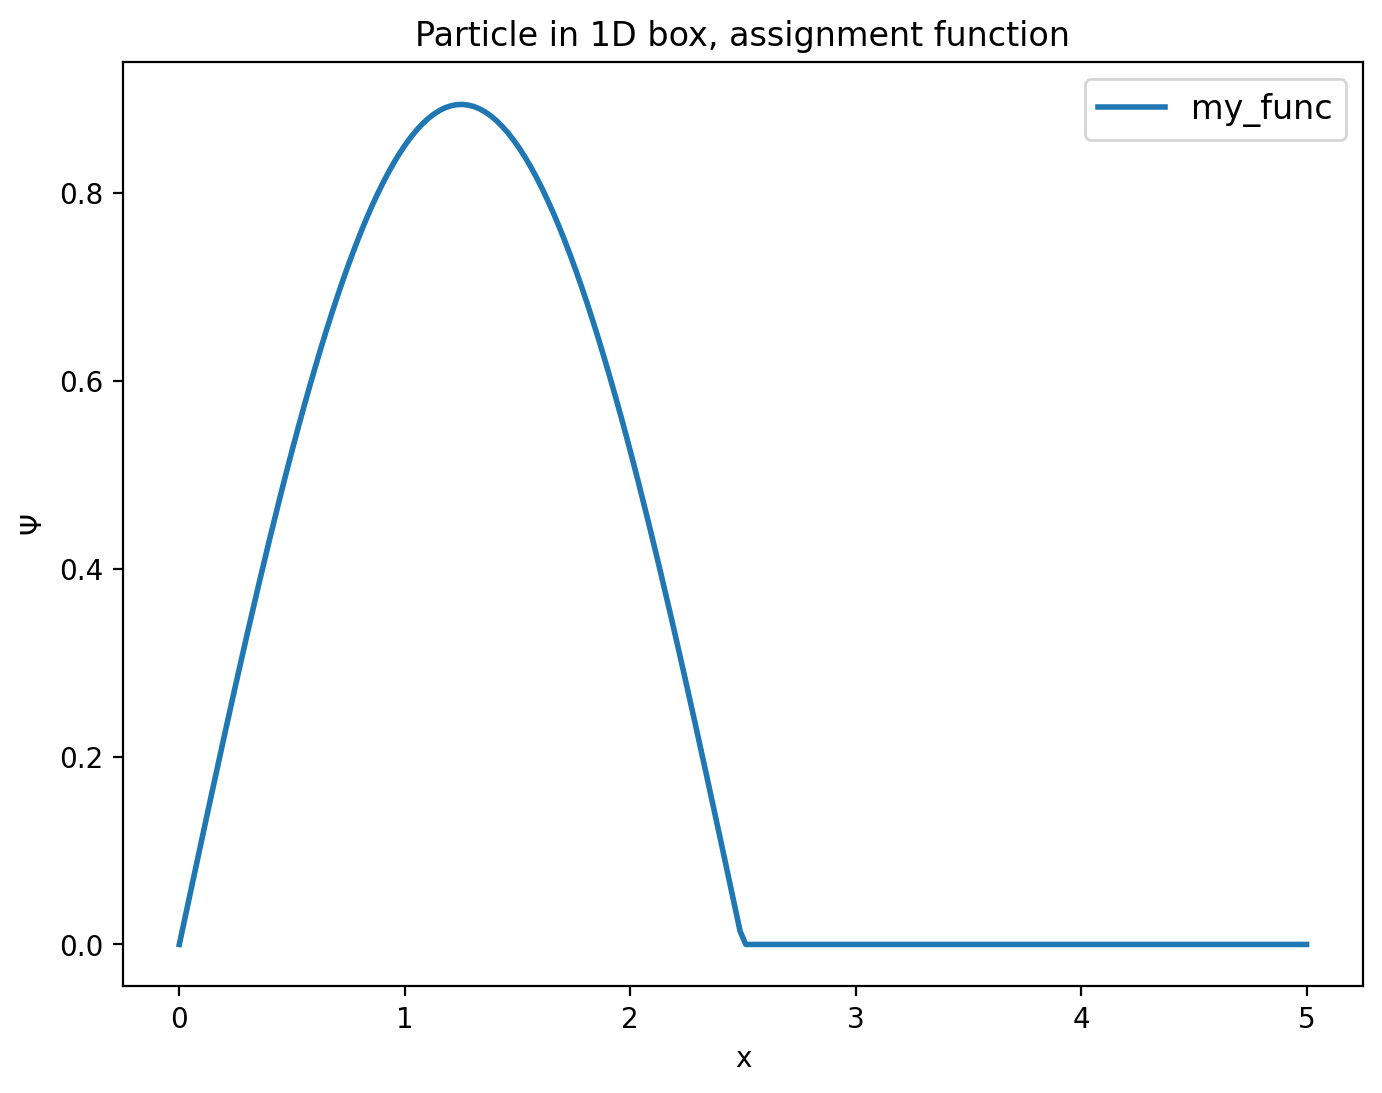

In [22]:
y_zero = np.zeros(N)  # numpy array of N zeroes

# initialize plot
fig = plt.figure(figsize=(8,6), dpi=200)

plt.title("Particle in 1D box, assignment function")
plt.xlabel("x")
plt.ylabel("$\Psi$")

plt.plot(x_axis, my_func, '-', label=f"my_func", lw=2)

plt.legend(fontsize=12)

plt.show()

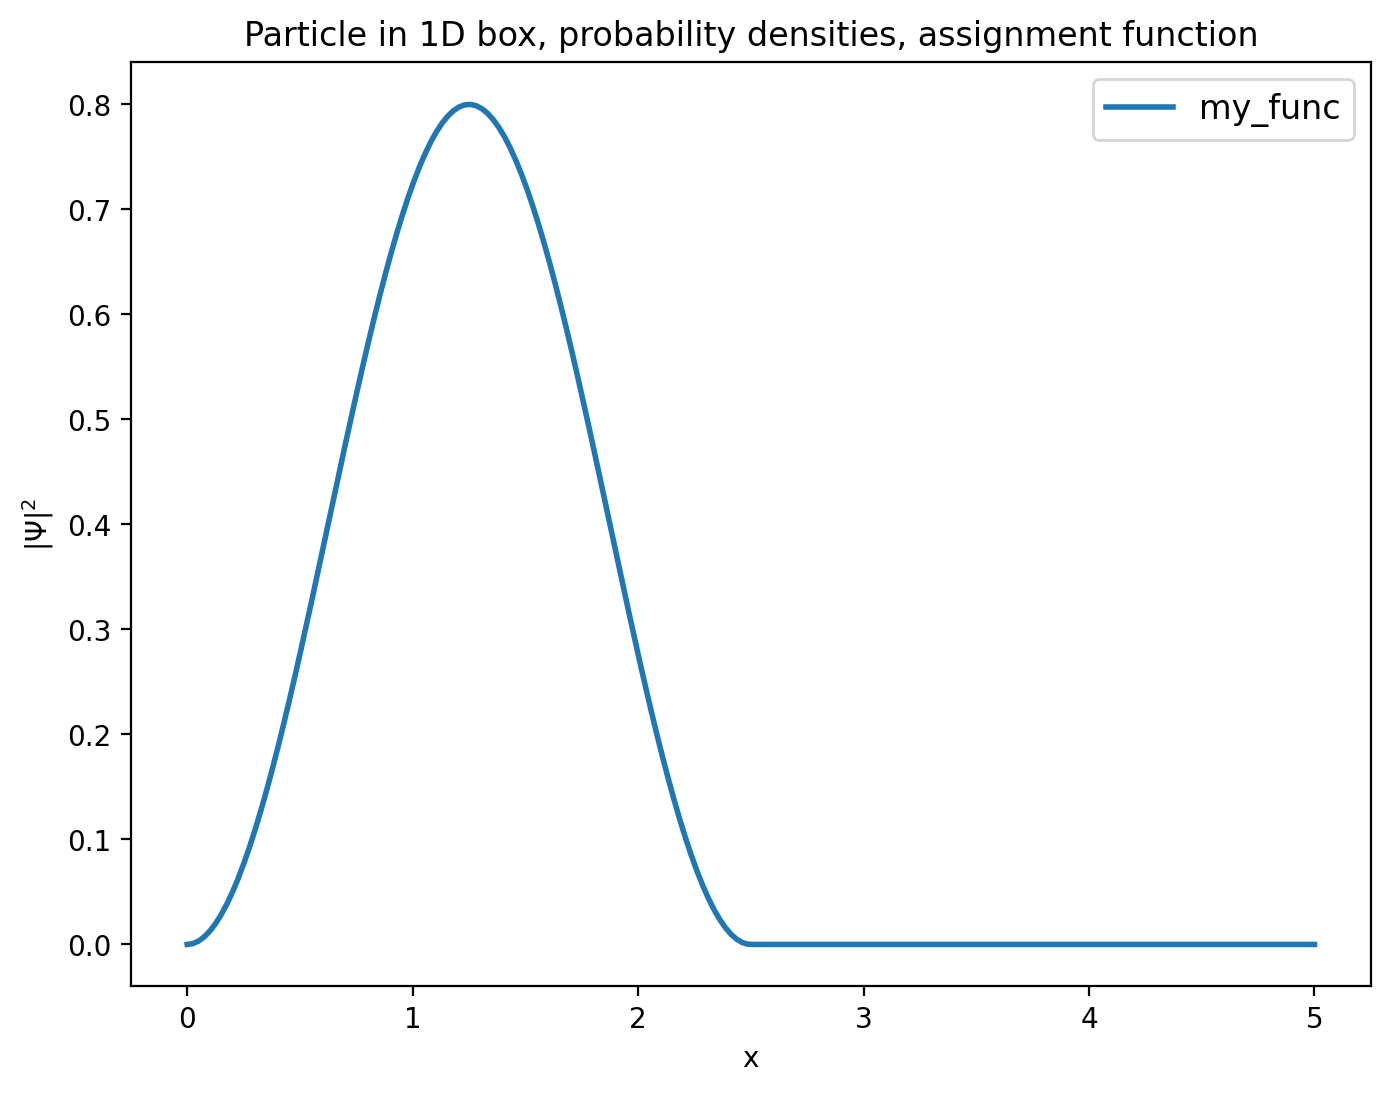

In [24]:
fig = plt.figure(figsize=(8,6), dpi=200)

plt.title("Particle in 1D box, probability densities, assignment function")
plt.xlabel("x")
plt.ylabel("$|\Psi|^2$")

plt.plot(x_axis, np.conjugate(my_func) * my_func, '-',label=f"my_func", lw=2)

plt.legend(fontsize=12)
plt.show()

## 2. Check that this function is normalized

In [25]:
dx = x_axis[1]-x_axis[0]

norm = sum(np.conjugate(my_func)*my_func)*dx

print(f"Norm = {norm:6.4f}")

def x2index(a):
    if 0 <= a <= L:
        return int(a/L*N)
    else:
        raise ValueError(f"a={a} is out of bounds; exit")
    
def index2x(index):
    if 0 <= index <= N:
        return (index/N*L)
    else:
        raise ValueError(f"index={index} is out of bounds; exit")
    
a = 0
b = L/2

index_a = x2index(a)
index_b = x2index(b)

P_ab = sum(np.conjugate(my_func)[index_a : index_b] * my_func[index_a : index_b]) * dx

print(f"Probability to find a particle between {a} and {b} is {P_ab:6.4f}")

Norm = 1.0000
Probability to find a particle between 0 and 2.5 is 1.0000


## 3. Compute the expectation values of position, momentum, and energy (at time \( t=0 \)).

In [27]:
# position expectation value

x_ave_my_func = (np.conjugate(my_func) * x_axis * my_func).sum()*dx
print(f"my_func <x> = {x_ave_my_func:6.4f}")

# for the in-class function:
x_ave_my_func = (np.conjugate(my_func) * x_axis * my_func).sum()*dx
print(f"class function <x> = {x_ave_my_func:6.4f}")

my_func <x> = 1.2500
class function <x> = 1.2500


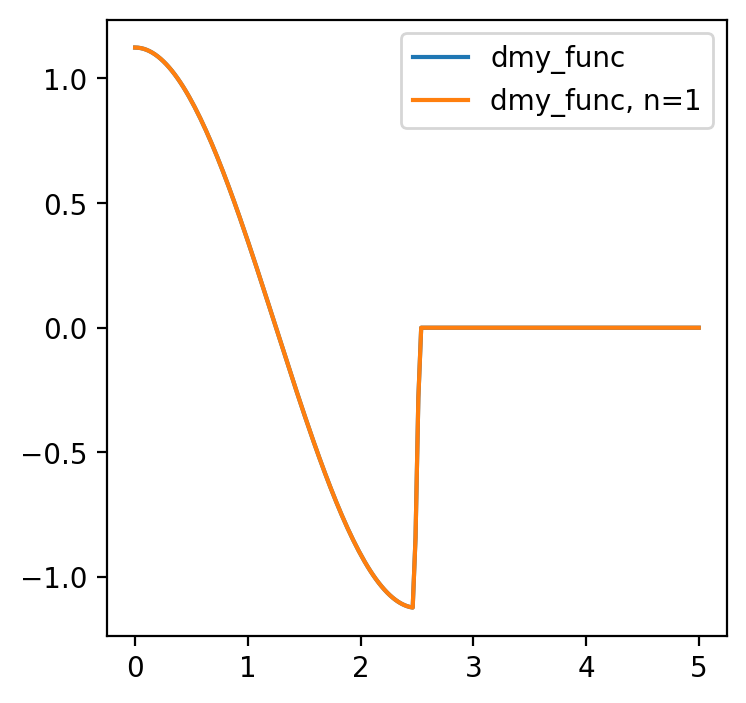

In [30]:
# Numpy gradient() can compute a derivative of an array:

dmy_func_array = np.gradient(my_func,dx)

# and similarly for a function defined on a linear space:
def dmy_func_linear(n):
    return np.gradient(my_func,dx)

# let's check that gradients are computed correctly
fig = plt.figure(figsize=(4,4), dpi=200)
plt.plot(x_axis, dmy_func_array, label="dmy_func")
plt.plot(x_axis, dmy_func_linear(1), label="dmy_func, n=1")
plt.legend()

In [33]:
# second derivative is computed as a derivative of the first derivative
# for our in-class function
ddmy_func = np.gradient(dmy_func_array,dx)

# for eigenstates:
def ddmy_func(n):
    return np.gradient(dmy_func_linear(n),dx)

# average energy of n=1 eigenstate
E_exp_my_func = -hbar**2/(2*m)*(np.conjugate(my_func) *ddmy_func(1)).sum()*dx
print(f"my_func <H> = {E_exp_my_func:6.4f}")

# average energy for the in-class function
E_exp_my_func = -hbar**2/(2*m)*(np.conjugate(my_func)*ddmy_func(1)).sum() * dx
print(f"Class function <H> = {E_exp_my_func:6.4f}")

my_func <H> = 0.7834
Class function <H> = 0.7834


## 4. How does the average energy, position, and momentum compare to the lowest-energy 1D particle in the box eigenstate? 

1st eigenstate <x> = 2.5000


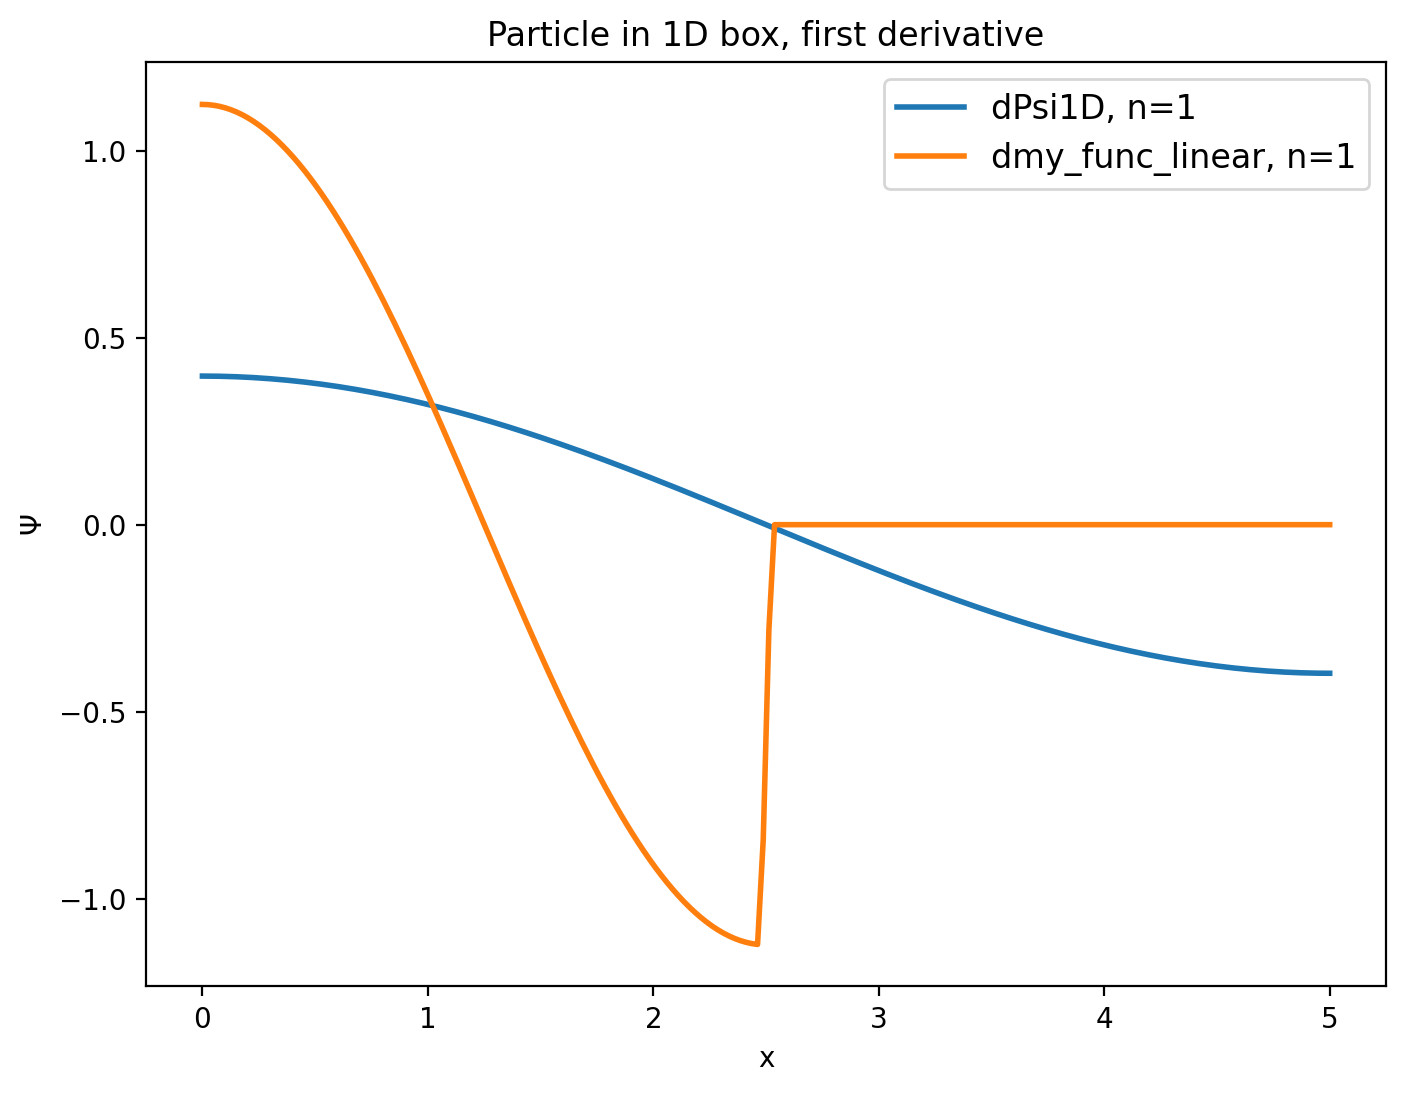

In [43]:
# position expectation value

# for the n=1 eigenstate (using an alternative way to use sum()):
x_ave_Psi1 = (np.conjugate(Psi1D(1)) * x_axis * Psi1D(1)).sum()*dx
print(f"1st eigenstate <x> = {x_ave_Psi1:6.4f}")

# and similarly for a function defined on a linear space:
def dPsi1D(n):
    return np.gradient(Psi1D(n),dx)

# plot the first derivative of the n=1 eigenstate as well as dmy_func_linear
fig = plt.figure(figsize=(8,6), dpi=200)

plt.title("Particle in 1D box, first derivative")
plt.xlabel("x")
plt.ylabel("$\Psi$")
plt.plot(x_axis, dPsi1D(1), '-',label=f"dPsi1D, n=1", lw=2)
plt.plot(x_axis, dmy_func_linear(1), '-',label=f"dmy_func_linear, n=1", lw=2)
plt.legend(fontsize=12)
plt.show()
               

In [44]:
# add now momentum expectation values

# momentum expectation value for n=1 state
p_exp = (hbar/1j * np.conjugate(Psi1D(1)) * dPsi1D(1)).sum() * dx
print(f"1st eigenstate <p> = {p_exp:6.4f}")

# momentum expectation value for my_func
p_exp = (hbar/1j * np.conjugate(my_func) * dmy_func_linear(1)).sum() * dx
print(f"my_func <p> = {p_exp:6.4f}")


1st eigenstate <p> = 0.0000+0.0000j
my_func <p> = 0.0000+0.0000j


In [45]:
# second derivative is computed as a derivative of the first derivative

ddPsi1D = np.gradient(dPsi1D(1),dx)

# average energy of n=1 eigenstate
E_exp_Psi1D = -hbar**2/(2*m)*(np.conjugate(Psi1D(1)) *ddPsi1D).sum()*dx
print(f"1st eigenstate <H> = {E_exp_Psi1D:6.4f}")

# average energy for my_func
E_exp_my_func = -hbar**2/(2*m)*(np.conjugate(my_func)*ddmy_func(1)).sum() * dx
print(f"my_func <H> = {E_exp_my_func:6.4f}")

1st eigenstate <H> = 0.1974
my_func <H> = 0.7834


## 5. Compute and print the first ten \( c_n \) coefficients and their squared values \( |c_n|^2 \).

In [37]:
# first compute c1:
c1 = (np.conjugate(Psi1D(1)) * my_func).sum() * dx
print(f"c1 = {c1:2.4e}")

# and now we can generalize it for any c_n:
print("\nFirst 10 cn coefficients")
for n in range(1,11):
    cn = (np.conjugate(Psi1D(n)) * my_func).sum() * dx
    print(f"c{n} = {cn:2.2e}")

# print thd c_n^2 values
print("\nFirst 10 cn^2 coefficients")
for n in range(1,11):
    cn = (np.conjugate(Psi1D(n)) * my_func).sum() * dx
    print(f"c{n}^2 = {cn**2:2.2e}")

c1 = 6.0023e-01

First 10 cn coefficients
c1 = 6.00e-01
c2 = 7.07e-01
c3 = 3.60e-01
c4 = 2.20e-17
c5 = -8.57e-02
c6 = -2.30e-17
c7 = 4.00e-02
c8 = 7.65e-17
c9 = -2.34e-02
c10 = -2.04e-17

First 10 cn^2 coefficients
c1^2 = 3.60e-01
c2^2 = 5.00e-01
c3^2 = 1.30e-01
c4^2 = 4.83e-34
c5^2 = 7.35e-03
c6^2 = 5.30e-34
c7^2 = 1.60e-03
c8^2 = 5.86e-33
c9^2 = 5.46e-04
c10^2 = 4.16e-34


## 6. Are there any eigenstates that do not contribute to the wavefunction \( f(x) \) at time \( t=0 \)? Why?

Yes, eigenstates 4, 6, 8, and 10 do not significantly contribute because their c_n values are very close to zero.
    
    

## 7. Compute the average energy using \( c_n \) coefficients as:

$$ 
\langle H \rangle = \sum_n |c_n|^2 E_n 
$$

Compare this value with the average energy you computed in step 3. 

In [40]:
 # compute the expectation value of energy for the class function
# and compare it with the previous result:

E_exp_cn = 0.0
for n in range(1,11):
    cn = (np.conjugate(Psi1D(n)) * my_func).sum() * dx
    E_exp_cn += Ene1D(n) * np.conjugate(cn) * cn
print(f"\n<H> = {E_exp_cn:4.4f}")

print(f"Error in energy calculations {(E_exp_my_func - E_exp_cn):2.2e}")


<H> = 0.7567
Error in energy calculations 2.66e-02


## 8. (Extra credit) Explore the time evolution of this wavefunction. Plot real and imaginary parts of the wavefunction, the probability density, and the expectation value of position \( \langle x \rangle \) as a function of time.

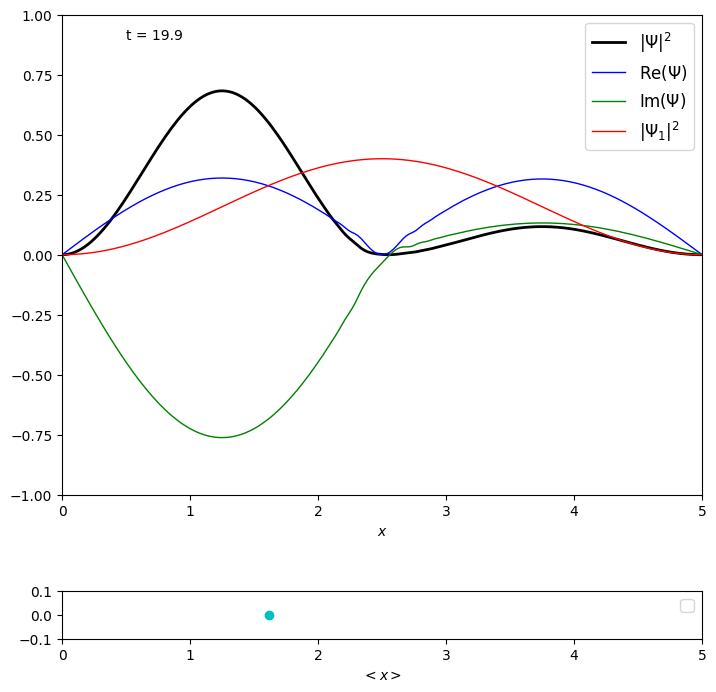

In [41]:
from IPython.display import *
import scipy

# func is an arbitrary function (array) defined on x_axis array
func = my_func

# time-dependent wave function defined on x_axis array
def wf_td(t):
    wf = np.zeros(N)
    for n in range(1,100):
        cn = (np.conjugate(Psi1D(n))*func).sum() * dx
        wf = wf + cn * Psi1D(n) * np.exp(-1j * Ene1D(n) * t/hbar)
    return wf

# time-dependent expectation value of position
def x_exp_td(t):
    wf = np.zeros(N)
    x_exp = 0
    for n in range(1,100):
        cn = (np.conjugate(Psi1D(n)) * func).sum() * dx
        wf = wf + cn * Psi1D(n) * np.exp(-1j * Ene1D(n) * t/hbar)
    x_exp = (np.conjugate(wf) * x_axis * wf).sum() * dx
    return x_exp

# initialization
t = 0
t_max = 200   # maximum time - defines the length of this simulation

y = np.zeros(200)
x_ave_0 = x_exp_td(0)

fig = plt.figure()
ax1 = plt.axes([0.0,0.0,1,1])
graph_handle1, = plt.plot(x_axis, y, lw=2, color='black', label='$|\Psi|^2$')
graph_handle2, = plt.plot(x_axis, y, lw=1, color='blue', label='Re($\Psi$)')
graph_handle3, = plt.plot(x_axis, y, lw=1, color='green', label='Im($\Psi$)')
graph_handle4, = plt.plot(x_axis, y, lw=1, color='red', label='$|\Psi_1|^2$')
text_handle = plt.text(0.1*L,0.9,'t = '+'{:.1f}'.format(t))
plt.xlabel('$x$')
plt.xlim([0,L])
plt.ylim([-1,1])
plt.legend(fontsize=12, loc=1)

ax2 = plt.axes([0.0,-0.3,1,0.1])
plt.xlabel('$<x>$')
x_ave, = plt.plot(x_ave_0,0, 'co')
plt.ylim([-0.1,0.1])
plt.xlim([0,L])
plt.legend(fontsize=12)

for t in range(0,t_max):
    graph_handle1.set_xdata(x_axis)
    y = np.conjugate(wf_td(t/10))*wf_td(t/10)
    graph_handle1.set_ydata(y)
    y = np.imag(wf_td(t/10))
    graph_handle2.set_ydata(y)
    y = np.real(wf_td(t/10))
    graph_handle3.set_ydata(y)
    # |Psi1D|^2 for reference
    y = np.conjugate(Psi1D(1))*Psi1D(1)
    graph_handle4.set_ydata(y)

    x_ave_value = x_exp_td(t/10)
    x_ave.set_xdata([x_ave_value])  # Pass a list with a single value

    x_ave.set_ydata([0])            # Set y data as a list with zero

    text_handle.set_text('t = '+'{:.1f}'.format(t/10))
    display(plt.gcf())
    clear_output(wait=True)

    